LESSON 4:ENTAGLEMENT IN ACTION

SUPERDENSE CODING

In [102]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

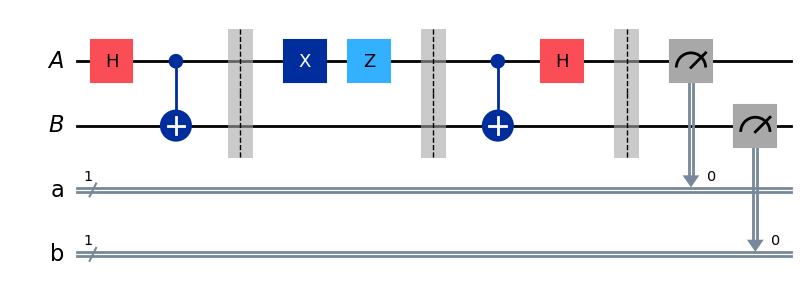

In [103]:
qA=QuantumRegister(1,"A")
qB=QuantumRegister(1,"B")
a=ClassicalRegister(1,"a")
b=ClassicalRegister(1,"b")
#Qubit pair initialization
protocol=QuantumCircuit(a,b,qA,qB)
protocol.h(qA)
protocol.cx(qA,qB)
protocol.barrier()
#ALice (Case : 1,1)
protocol.x(qA) #When first bit is 1 ie (1,0) and (1,1)
protocol.z(qA) #When second bit is 1 ie (0,1) and (1,1)
protocol.barrier()

#BOB
protocol.cx(qA,qB)
protocol.h(qA)
protocol.barrier()

protocol.measure(qA,a)
protocol.measure(qB,b)
display(protocol.draw("mpl"))



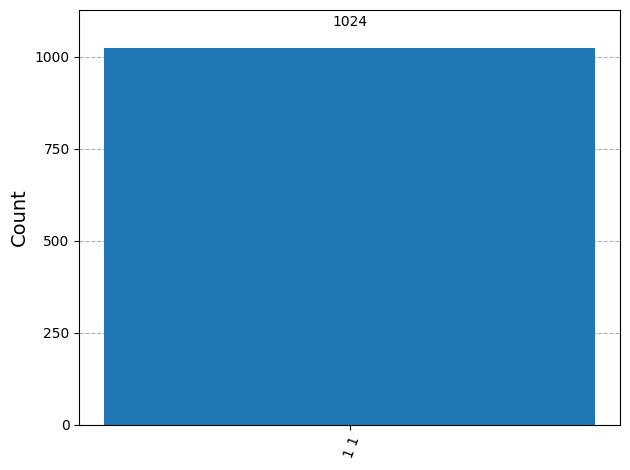

In [104]:
#Rewsult
compiled=transpile(protocol,AerSimulator())
result=AerSimulator().run(compiled).result()
stats = result.get_counts()

plot_histogram(stats)


For random bits 


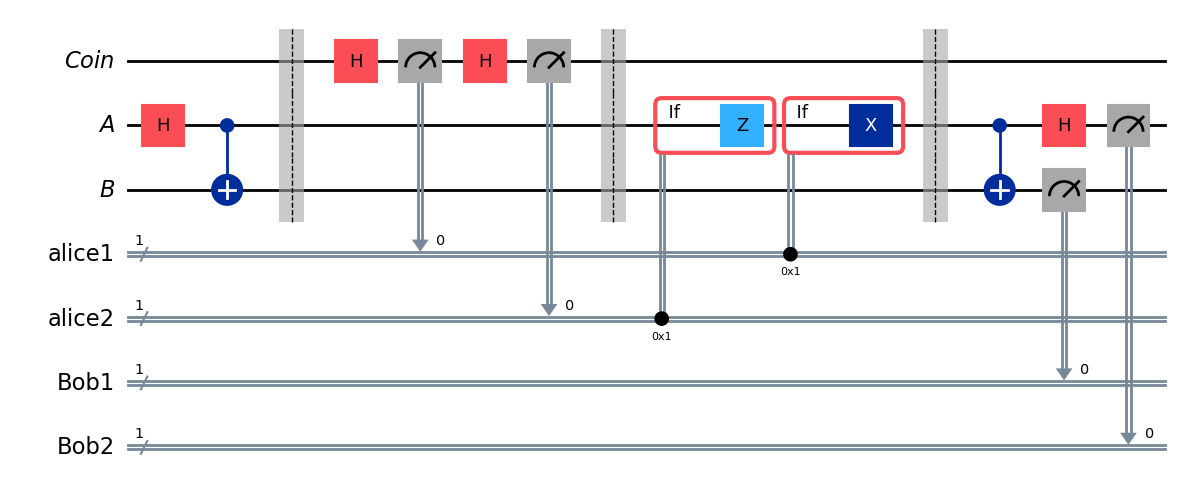

In [105]:
rbg=QuantumRegister(1,"Coin")
qA=QuantumRegister(1,"A")
qB=QuantumRegister(1,"B")

a=ClassicalRegister(1,"alice1")
b=ClassicalRegister(1,"alice2")
test=QuantumCircuit(rbg,qA,qB,a,b)

#Inital q pair
test.h(qA)
test.cx(qA,qB)
test.barrier()

#Using Coin twice to generate  a and b fair
test.h(rbg)
test.measure(rbg,a)
test.h(rbg)
test.measure(rbg,b)
test.barrier()
with test.if_test((b,1),label="Z"):  #Label is just for aesthetic value
    test.z(qA)
with test.if_test((a,1),label="X"):  #Label is just for aesthetic value
    test.x(qA)
test.barrier()

#BOB
test.cx(qA,qB)
test.h(qA)

#BOB measurements
Ba=ClassicalRegister(1,"Bob1")
Bb=ClassicalRegister(1,"Bob2")
test.add_register(Ba)
test.add_register(Bb)
test.measure(qA,Bb)
test.measure(qB,Ba)
display(test.draw("mpl"))


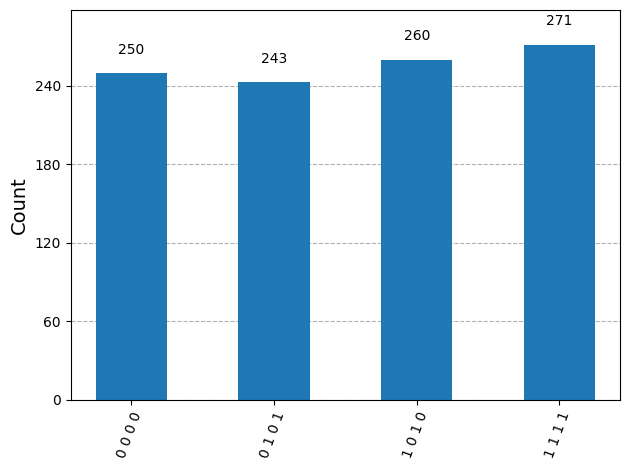

In [106]:
#result
result=AerSimulator().run(test).result()
srtas=result.get_counts()
plot_histogram(srtas)